In [1]:
#Expand notebook to take full screen width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

###
import sys
sys.path.insert(0,'../../src/')

%load_ext autoreload
%autoreload 2

#%pdb

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import pickle
import pandas as pd
sns.reset_orig()
matplotlib.rcParams.update({'font.size': 12})
from utils_write import loadfile, stack_weights, cr_calc

In [11]:
#SWS
#SWS w/ Scale
#SWS w/ Scale fixed
sws = loadfile(1, 0.1, 1000, 1000, 1e-6, int(0), 16, "LeNet_300_100", scaling=False, model_save_dir = "./files")
swss = loadfile(1, 0.1, 1000, 1000, 1e-6, int(0), 16, "LeNet_300_100", scaling=True, model_save_dir = "./files")
swssf = loadfile(1, 0.1, 1000, 1000, 1e-6, int(0), 16, "LeNet_300_100", scaling=True, model_save_dir = "./files", fn="_S0")

#SWS KD
kd = loadfile(250, 10, 2500, 1250, 1e-6, 5, 16, "LeNet_300_100", model_save_dir = "./files", scaling=False, fn = "_MSE")
#SWS KD w/ Scale
kds = loadfile(250, 10, 2500, 1250, 1.3e-6, 5, 16, "LeNet_300_100", model_save_dir = "./files", scaling=True, fn = "_MSE")
#SWS KD w/ Scale fixed
kdsf = loadfile(250, 10, 2500, 1250, 1.3e-6, 5, 16, "LeNet_300_100", model_save_dir = "./files", scaling=True, fn = "_MSE_S0")

In [18]:
s_exp = pd.DataFrame(columns = ["method", "acc", "sp"])
s_exp.loc[0] = (["sws", sws["prune_acc"]["test"], sws["sparsity"]])
s_exp.loc[1] = (["swss", swss["prune_acc"]["test"], swss["sparsity"]])
s_exp.loc[2] = (["swssf", swssf["prune_acc"]["test"], swssf["sparsity"]])
s_exp.loc[3] = (["kd", kd["prune_acc"]["test"], kd["sparsity"]])
s_exp.loc[4] = (["kds", kds["prune_acc"]["test"], kds["sparsity"]])
s_exp.loc[5] = (["kdsf", kdsf["prune_acc"]["test"], kdsf["sparsity"]])

In [20]:
s = s_exp.query("method == \'sws\'")
ss = s_exp.query("method == \'swss\'")
ssf = s_exp.query("method == \'swssf\'")
kd = s_exp.query("method == \'kd\'")
kds = s_exp.query("method == \'kds\'")
kdsf = s_exp.query("method == \'kdsf\'")

In [25]:
[s['acc'], ss['acc']], [s['sp'], ss['sp']]

([0    97.51
  Name: acc, dtype: float64, 1    97.5
  Name: acc, dtype: float64], [0    97.752897
  Name: sp, dtype: float64, 1    97.781404
  Name: sp, dtype: float64])

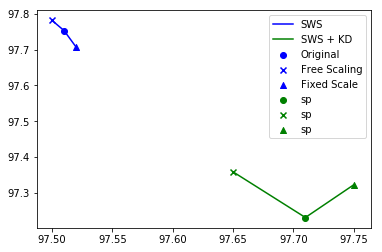

In [33]:
plt.scatter(s['acc'], s['sp'], color = 'b', marker = 'o', label = "Original")
plt.scatter(ss['acc'], ss['sp'], color = 'b', marker = 'x', label = "Free Scaling")
plt.scatter(ssf['acc'], ssf['sp'], color = 'b', marker = '^', label = "Fixed Scale")

plt.scatter(kd['acc'], kd['sp'], color = 'g', marker = 'o')
plt.scatter(kds['acc'], kds['sp'], color = 'g', marker = 'x')
plt.scatter(kdsf['acc'], kdsf['sp'], color = 'g', marker = '^')

plt.plot([float(s['acc']), float(ss['acc'])], [float(s['sp']), float(ss['sp'])], color = 'b', label = "SWS")
plt.plot([float(s['acc']), float(ssf['acc'])], [float(s['sp']), float(ssf['sp'])], color = 'b')
plt.plot([float(kd['acc']), float(kds['acc'])], [float(kd['sp']), float(kds['sp'])], color = 'g', label = "SWS + KD")
plt.plot([float(kd['acc']), float(kdsf['acc'])], [float(kd['sp']), float(kdsf['sp'])], color = 'g')
plt.legend()

### Init std dev

In [40]:
dev = {}
for layer in sws['init_weights']:
    dev[layer] = np.std(sws['init_weights'][layer])

for layer in dev:
    print (dev[layer]/dev['fc1'])

1.0
1.13086
1.456649
